# Final Project: Population Regression

## TaskA Singapore

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model,metrics
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
%matplotlib inline
df = pd.read_excel('singapore.xlsx')
minMax = MinMaxScaler()
df['population'] = df['population'].str.replace(',', '').astype(int)
normalizedDf = minMax.fit_transform(df)



In [2]:
trainDf = df[df['year'] <= 2013]
testDf = df[df['year'] > 2013]

In [3]:
trainDf_norm = normalizedDf[0:64,0:]
testDf_norm = normalizedDf[64:,0:]
#normalizedDf

## (a) Graph the total population vs year

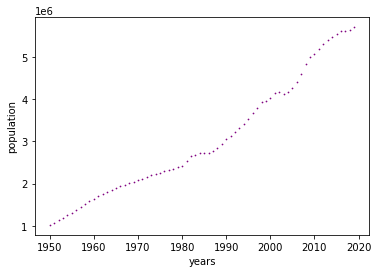

In [4]:
plt.xlabel('years')
plt.ylabel('population')
plt.scatter(df.year, df.population, color="purple", s=0.5)

## (b) Use linear regression to build an estimator of the total population of Singapore in the future. Use the data for years 2013 and earlier as training data.

In [5]:
linearReg = linear_model.LinearRegression()
linearReg.fit(trainDf[['year']], trainDf.population)

LinearRegression()

## (c) Performance metrics

## i. What are the slope and y-intercept of the best fit line? Plot the best fit line over the empirical data.

the slope is: [63343.22625916]
the y-intercept is: -122692970.62939566


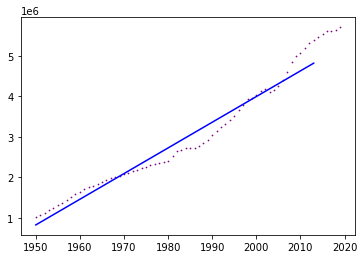

In [6]:
b1 = linearReg.coef_
b0 = linearReg.intercept_
plt.scatter(df.year, df.population, color="purple", s=0.5)
trainDf_pred = linearReg.predict(trainDf[['year']])
testDf_pred = linearReg.predict(testDf[['year']])
plt.plot(trainDf.year, trainDf_pred, color="blue")
print('the slope is:', b1)
print('the y-intercept is:', b0)

## ii. What is the R2 coefficient for the best fit line?

In [7]:
R2_train = metrics.r2_score(trainDf.population, trainDf_pred)
R2_test = metrics.r2_score(testDf.population, testDf_pred)
print('R^2 of training set is:', R2_train)
print('R^2 of test set is:', R2_test)

R^2 of training set is: 0.961047324000455
R^2 of test set is: -54.71598446743241


## it can be found that the R^2 of test set is negative, which means the linear model fits worse than a horizontal line.

## iii. What is the mean squared error (MSE) of the estimator on the training data?

In [8]:
MSE_train = metrics.mean_squared_error(trainDf.population, trainDf_pred, squared=False)
print('MSE of training set is:', MSE_train)

MSE of training set is: 235576.9376360042


## iv. Use years greater than 2013 as test data and predict the population for those years.

In [9]:
for i in range(0, 6):
    print('the population of', i + 2014, 'is:', testDf_pred[i])

the population of 2014 is: 4880287.056547627
the population of 2015 is: 4943630.282806784
the population of 2016 is: 5006973.509065941
the population of 2017 is: 5070316.735325098
the population of 2018 is: 5133659.961584255
the population of 2019 is: 5197003.187843412


## v. What is the MSE of the estimator on the test data?

In [10]:
MSE_test = metrics.mean_squared_error(testDf.population, testDf_pred, squared=False)
print('MSE of test set is:', MSE_test)

MSE of test set is: 557206.2662935543


# d. What is your estimate of Singapore’s population in 2030 and 2050? Do you think these estimates are reasonable? Explain your answer.

If I use the linear estimator above, the population in 2030 and 2050 will be like:

In [11]:
yearFuture = []
for i in range(2020, 2051):  
    yearFuture.append([i])

the population of 2030 is: 5893778.67669414
the population of 2030 is: 7160643.201877296


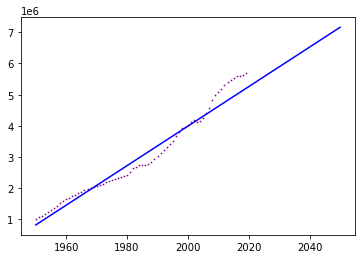

In [12]:
df2 = pd.DataFrame(yearFuture, columns=['year'])
wholeYear = df[['year']].append(df2, ignore_index=True)
wholeYearPredict = linearReg.predict(wholeYear)
plt.plot(wholeYear, wholeYearPredict, color="blue")
plt.scatter(df.year, df.population, color="purple", s=0.5)
print('the population of 2030 is:', wholeYearPredict[80])
print('the population of 2030 is:', wholeYearPredict[100])

this results are not reasonable, since population growth should not be linear, or simply exponential.

# e. What pattern do you expect for human population growth in Singapore?

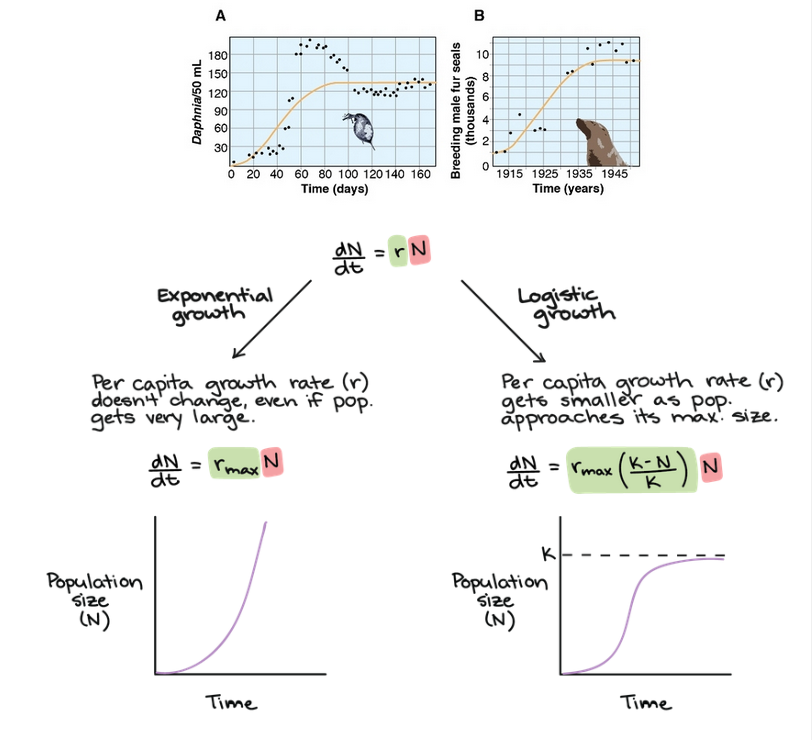

According to the materials we found previously, the growth pattern of population can be exponential ideally. However, in reality, it is impossible for population to grow in exponential pattern, since there are lots of limitaion and inhibitation out there. Logistic growth is suggested to be the normal pattern of population growth in the wild, and we will give it a try.

In [13]:
def logisticGrowth(t, a, b, c):
    return c / (1+a*np.exp(-b*t))

In [14]:
p0 = np.random.exponential(size = 3)

In [15]:
bounds = (0, [1000., 3., 6500000.])
import scipy.optimize as optim
x = np.array(trainDf['year']) - 1950
x_whole = np.array(df['year']) - 1950
y = np.array(trainDf['population']) - 1022100
y_whole = np.array(df['population']) - 1022100

In [16]:
(a, b, c), cov = optim.curve_fit(logisticGrowth, x, y, bounds=bounds)

In [17]:
a, b, c, cov

(18.80647208532577,
 0.055626325811584755,
 6499999.999999999,
 array([[ 1.26910898e+00, -7.23243285e-04,  3.50078120e+05],
        [-7.23243285e-04,  8.80604579e-06, -1.55941258e+03],
        [ 3.50078120e+05, -1.55941258e+03,  3.19696272e+11]]))

In [18]:
x_future = np.arange(0, 101 )
x_test = np.arange(64, 70)
print(x_future)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


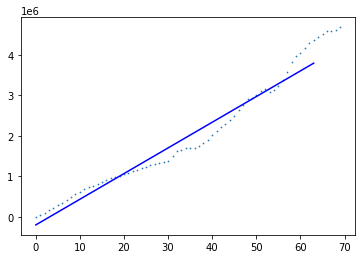

In [19]:
plt.scatter(x_whole, y_whole, s=0.5)
plt.plot(trainDf.year - 1950, trainDf_pred - 1022100, color="blue")

In [20]:
def theLogistic(a,b,c,t):
    return c / (1+a*np.exp(-b*t))

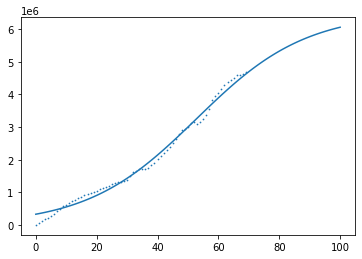

In [21]:
plt.scatter(x_whole, y_whole, s=0.5)
plt.plot(x_future, theLogistic(a,b,c,x_future))

In [22]:
R2_logi = metrics.r2_score(y, theLogistic(a,b,c,x))

In [23]:
R2_logi

0.9868417570075397

In [24]:
MSE_train = metrics.mean_squared_error(y, theLogistic(a,b,c,x), squared=False)
print('MSE of training set is:', MSE_train)

MSE of training set is: 136918.79671289385


In [25]:
MSE_test = metrics.mean_squared_error(testDf.population - 1022100, theLogistic(a,b,c,x_test), squared=False)
print('MSE of test set is:', MSE_test)

MSE of test set is: 152724.196354273


## TaskB

In [26]:
df2=pd.read_excel("china.xlsx")
df2.head()

,year,population
0,1960,667070000
1,1961,660330000
2,1962,665770000
3,1963,682335000
4,1964,698355000


In [27]:
df2.dtypes

year          int64
population    int64
dtype: object

In [28]:
X_train = df2[df2['year'] <= 2013]
X_test = df2[df2['year'] > 2013]
normalizedDf2 = minMax.fit_transform(df2)
X_train_norm = normalizedDf2[0:54,0:]
X_test_norm = normalizedDf2[54:,0:]

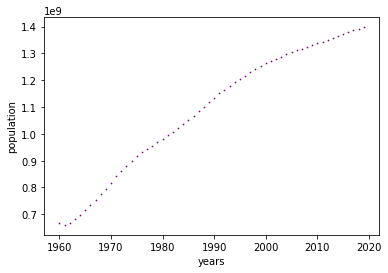

In [29]:
plt.xlabel('years')
plt.ylabel('population')
plt.scatter(df2.year, df2.population, color="purple", s=0.5)

In [30]:
x = np.array(X_train['year']) - 1960
x_whole = np.array(df2['year']) - 1960
y = np.array(X_train['population']) - 667070000
y_whole = np.array(df2['population']) - 667070000

In [31]:
bounds = (0, [1000., 3., 6800000000000000.])
(a2, b2, c2), cov = optim.curve_fit(logisticGrowth, x, y, bounds=bounds)
a2, b2, c2, cov

(11.883491189302637,
 0.11009007707460747,
 690161235.8223131,
 array([[ 1.06326778e+00,  4.41071494e-03, -5.38241284e+06],
        [ 4.41071494e-03,  2.49414148e-05, -4.79432299e+04],
        [-5.38241284e+06, -4.79432299e+04,  1.55284238e+14]]))

In [32]:
x_future = np.arange(0, 81)
x_test = np.arange(54, 60)

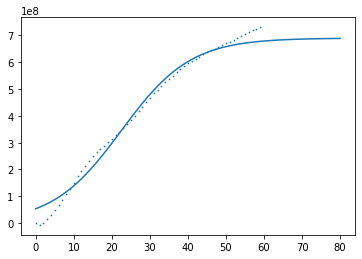

In [33]:
plt.scatter(x_whole, y_whole, s=0.5)
plt.plot(x_future, theLogistic(a2,b2,c2,x_future))

In [34]:
R2_logi = metrics.r2_score(y, theLogistic(a2,b2,c2,x))

In [35]:
R2_logi

0.9871349926906683

In [36]:
MSE_train = metrics.mean_squared_error(y, theLogistic(a,b,c,x), squared=False)
print('MSE of training set is:', MSE_train)

MSE of training set is: 444438196.2754237


In [37]:
MSE_test = metrics.mean_squared_error(testDf.population - 1022100, theLogistic(a,b,c,x_test), squared=False)
print('MSE of test set is:', MSE_test)

MSE of test set is: 988584.2817767548
